In [40]:
!pip install ucimlrepo
!pip install scikit-learn

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import  BernoulliNB,GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from ucimlrepo import fetch_ucirepo

In [58]:
# Descarga del dataset
wine_quality = fetch_ucirepo(id=186)
# Datos brutos en formato Dataframe de pandas
X = wine_quality.data.features
y = wine_quality.data.targets

In [59]:
# Convertir la calidad en variable categórica para clasificación
y_classification = y.copy()
y_classification["quality"] = y_classification["quality"].apply(lambda q: 1 if q >= 7 else 0)  # Binaria: 1 (bueno) o 0 (malo)

In [60]:
# Dividir los datos en entrenamiento y prueba
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_classification, test_size=0.2, random_state=42)

In [61]:
# Escalar los datos
scaler = StandardScaler()
X_train_clf = scaler.fit_transform(X_train_clf)
X_test_clf = scaler.transform(X_test_clf)

In [79]:
# Modelo de Clasificación (Naive Bayes)
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_clf, y_train_clf.values.ravel())
y_pred_clf = naive_bayes.predict(X_test_clf)


In [80]:

# Cálculo de métricas de clasificación
accuracy = accuracy_score(y_test_clf, y_pred_clf)
precision = precision_score(y_test_clf, y_pred_clf)
recall = recall_score(y_test_clf, y_pred_clf)
f1 = f1_score(y_test_clf, y_pred_clf)
conf_matrix = confusion_matrix(y_test_clf, y_pred_clf)

In [81]:
# Impresión de resultados
print(f"Naive Bayes - Accuracy: {accuracy}")
print(f"Naive Bayes - Precision: {precision}")
print(f"Naive Bayes - Recall: {recall}")
print(f"Naive Bayes - F1-Score: {f1}")
print(f"Naive Bayes - Matriz de Confusión: \n{conf_matrix}")

Naive Bayes - Accuracy: 0.7607692307692308
Naive Bayes - Precision: 0.42297650130548303
Naive Bayes - Recall: 0.6428571428571429
Naive Bayes - F1-Score: 0.510236220472441
Naive Bayes - Matriz de Confusión: 
[[827 221]
 [ 90 162]]


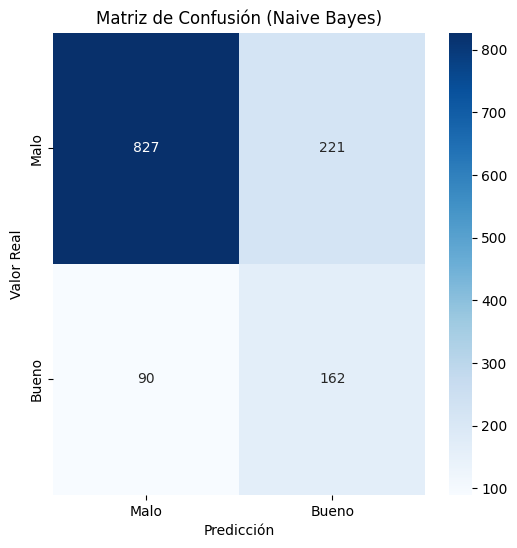

In [82]:
# Visualización de la matriz de confusión
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Malo", "Bueno"], yticklabels=["Malo", "Bueno"])
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión (Naive Bayes)")
plt.show()

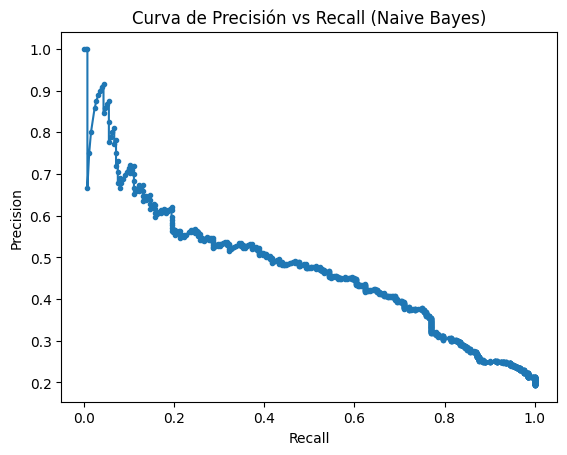

In [66]:
precision_curve, recall_curve, _ = precision_recall_curve(y_test_clf, naive_bayes.predict_proba(X_test_clf)[:, 1])

plt.plot(recall_curve, precision_curve, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva de Precisión vs Recall (Naive Bayes)")
plt.show()

In [52]:
# Modelo de Clasificación (Naive Bayes)
naive_bayes = BernoulliNB()
naive_bayes.fit(X_train_clf, y_train_clf.values.ravel())
y_pred_clf = naive_bayes.predict(X_test_clf)


In [54]:

# Cálculo de métricas de clasificación
accuracy = accuracy_score(y_test_clf, y_pred_clf)
precision = precision_score(y_test_clf, y_pred_clf)
recall = recall_score(y_test_clf, y_pred_clf)
f1 = f1_score(y_test_clf, y_pred_clf)
conf_matrix = confusion_matrix(y_test_clf, y_pred_clf)

In [55]:
# Impresión de resultados
print(f"Naive Bayes - Accuracy: {accuracy}")
print(f"Naive Bayes - Precision: {precision}")
print(f"Naive Bayes - Recall: {recall}")
print(f"Naive Bayes - F1-Score: {f1}")
print(f"Naive Bayes - Matriz de Confusión: \n{conf_matrix}")

Naive Bayes - Accuracy: 0.7523076923076923
Naive Bayes - Precision: 0.3870967741935484
Naive Bayes - Recall: 0.47619047619047616
Naive Bayes - F1-Score: 0.42704626334519574
Naive Bayes - Matriz de Confusión: 
[[858 190]
 [132 120]]


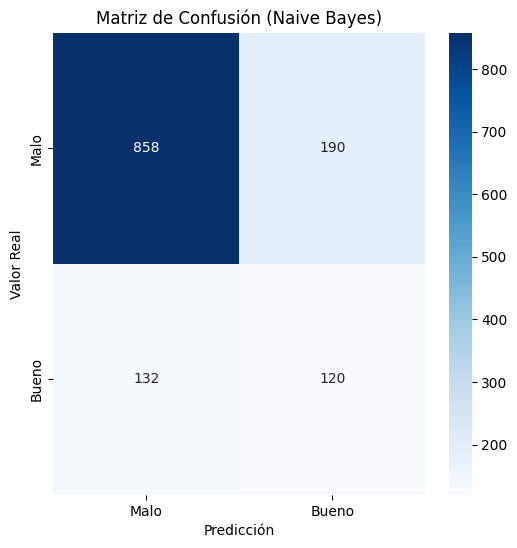

In [56]:
# Visualización de la matriz de confusión
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Malo", "Bueno"], yticklabels=["Malo", "Bueno"])
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión (Naive Bayes)")
plt.show()

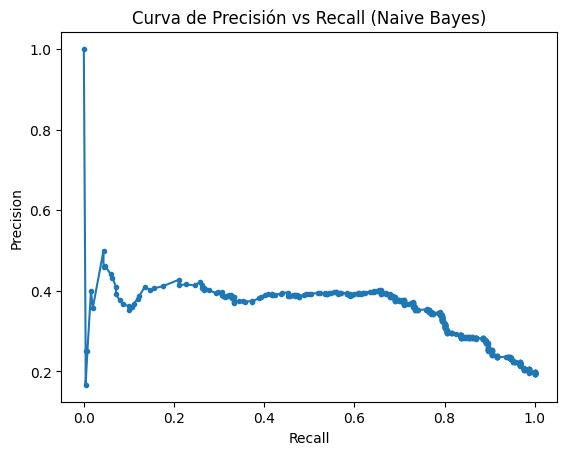

In [57]:
precision_curve, recall_curve, _ = precision_recall_curve(y_test_clf, naive_bayes.predict_proba(X_test_clf)[:, 1])

plt.plot(recall_curve, precision_curve, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva de Precisión vs Recall (Naive Bayes)")
plt.show()